In [1]:
!pwd

/Users/evaafriana/code/evafriana/introduction_to_python_for_data_science/pandas_training


In [2]:
path_to_file = "/Users/evaafriana/code/evafriana/introduction_to_python_for_data_science/pandas_training"

In [3]:
import pandas as pd 
data = pd.read_csv(path_to_file + "/covid-19.csv")
data = data.iloc[:, 1:]
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,933,264,Belgium,BE,BEL,11422068.0,Europe
1,2020-04-22,22,4,2020,973,170,Belgium,BE,BEL,11422068.0,Europe
2,2020-04-21,21,4,2020,1487,145,Belgium,BE,BEL,11422068.0,Europe
3,2020-04-20,20,4,2020,1313,230,Belgium,BE,BEL,11422068.0,Europe
4,2020-04-19,19,4,2020,1045,290,Belgium,BE,BEL,11422068.0,Europe


In [4]:
mask = data["geoId"] == "US"
us_data = data[mask]
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
575,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America
576,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America
577,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America
578,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America
579,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America


In [5]:
us_data = us_data.reset_index(drop=True)

In [6]:
us_data["cumulated_cases"] = 0
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,0
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,0
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,0
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,0
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,0


In [7]:
total_rows = len(us_data)
print(total_rows)

115


In [8]:
us_data.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
110,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
111,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
112,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
113,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0
114,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,327167434.0,America,0


In [9]:
for i in range(total_rows -2, -1, -1):
    us_data.loc[i, "cumulated_cases"] = us_data.loc[i, "cases"] + us_data.loc[i + 1, "cumulated_cases"]

In [10]:
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086


In [11]:
us_data["new_cases"] = 0
for i in range(total_rows -2, -1, -1):
    us_data.loc[i, "new_cases"] = us_data.loc[i, "cumulated_cases"] - us_data.loc[i +1, "cumulated_cases"]


In [12]:
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922


In [13]:
us_data["growth_ratio"] = 0
for i in range(total_rows -2, -1, -1):
    us_data.loc[i, "growth_ratio"] = us_data.loc[i, "new_cases"] + us_data.loc[i +1, "new_cases"]

us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
0,2020-04-23,23,4,2020,17588,1721,United_States_of_America,US,USA,327167434.0,America,842629,17588,54877
1,2020-04-22,22,4,2020,37289,2524,United_States_of_America,US,USA,327167434.0,America,825041,37289,65354
2,2020-04-21,21,4,2020,28065,1857,United_States_of_America,US,USA,327167434.0,America,787752,28065,52666
3,2020-04-20,20,4,2020,24601,1772,United_States_of_America,US,USA,327167434.0,America,759687,24601,57523
4,2020-04-19,19,4,2020,32922,1856,United_States_of_America,US,USA,327167434.0,America,735086,32922,63755


<AxesSubplot:xlabel='dateRep'>

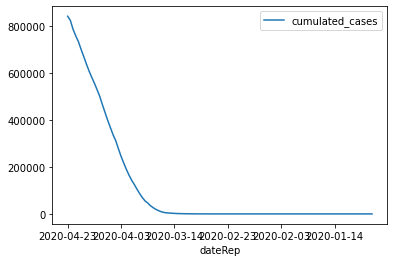

In [14]:
us_data.plot.line(x="dateRep", y="cumulated_cases")

In [15]:
us_data = us_data.sort_values("dateRep")
us_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,cumulated_cases,new_cases,growth_ratio
114,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0
113,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0
112,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0
111,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0
110,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0,America,0,0,0


<AxesSubplot:xlabel='dateRep'>

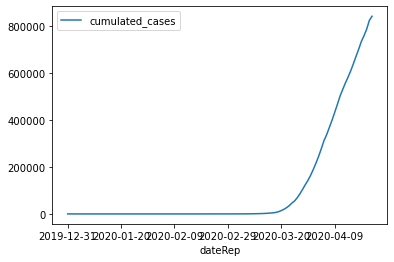

In [16]:
us_data.plot.line(x="dateRep", y="cumulated_cases")

<AxesSubplot:xlabel='dateRep'>

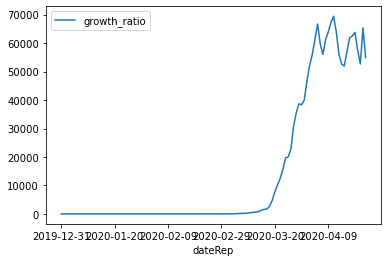

In [17]:
us_data.plot.line(x="dateRep", y="growth_ratio")

<AxesSubplot:xlabel='dateRep'>

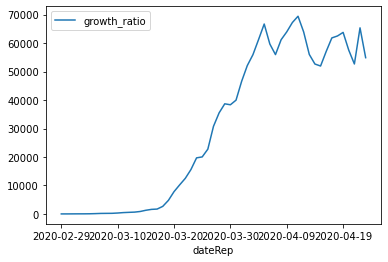

In [18]:
mask = us_data["dateRep"] >= "2020-02-29"
us_data[mask].plot.line(x="dateRep", y="growth_ratio")

<AxesSubplot:xlabel='dateRep'>

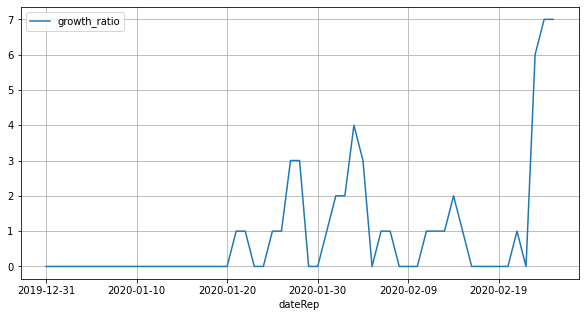

In [19]:
mask = us_data["growth_ratio"] <= 7.5
us_data[mask].plot.line(x="dateRep", y="growth_ratio", figsize=[10, 5], grid=True)

<AxesSubplot:xlabel='dateRep'>

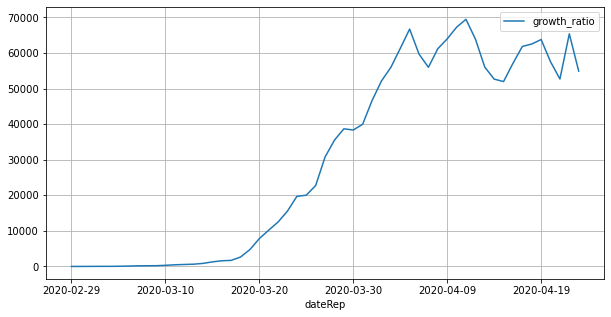

In [20]:
mask = us_data["dateRep"] >= "2020-02-29"
us_data[mask].plot.line(x="dateRep", y="growth_ratio", figsize=[10, 5], grid=True)

In [21]:
us_data.to_csv("us_data.csv")

In [22]:
us_data.to_excel("us_data.xlsx")